# High Demand and Low Supply: A Snapshot of DC Housing

---

Housing has persisted as one of DC’s most challenging social issues to navigate. Using a dataset from July 2018 containing detailed characteristics of over 150,000 residential properties in DC, this project will explore various aspects of the DC housing market to explain what are some of the driving factors behind major market trends. An depth analysis of this data yielded the following key insights:

- The average DC residence is 78 years old which means it has hit the limit of the average life expectancy for a home.
- The larger socioeconomic disparities of DC persist in the housing market as well with housing conditions in wards east of the river generally being worse than that of Northwest DC.
- The disparity is also expressed in contrasting home values of Wards 7 & 8 homes against the prices of central and Northwest DC wards.
- Living space is a highly demanded commodity in the District with home price expected to increase by $4,418 for every 100 square feet of living space.

In [64]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading Data
df_properties = pd.read_csv('DC_Properties.csv', low_memory=False)

# Exploring the Dataset
print(df_properties.head())
print(df_properties.info())


   Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0           0       4          0      Warm Cool  Y        2.0      8      4   
1           1       3          1      Warm Cool  Y        2.0     11      5   
2           2       3          1  Hot Water Rad  Y        2.0      9      5   
3           3       3          1  Hot Water Rad  Y        2.0      8      5   
4           4       2          1      Warm Cool  Y        1.0     11      3   

      AYB  YR_RMDL  ...  LONGITUDE  ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  \
0  1910.0   1988.0  ... -77.040832       Old City 2   040 D Old City 2   
1  1898.0   2007.0  ... -77.040764       Old City 2   040 D Old City 2   
2  1910.0   2009.0  ... -77.040678       Old City 2   040 D Old City 2   
3  1900.0   2003.0  ... -77.040629       Old City 2   040 D Old City 2   
4  1913.0   2012.0  ... -77.039361       Old City 2   040 D Old City 2   

   CENSUS_TRACT CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT  
0 

In [65]:
# Load the dataset
df_properties = pd.read_csv('DC_Properties.csv', low_memory=False)

# Select relevant columns for analysis
columns = ['BEDRM', 'CNDTN', 'AYB', 'GBA', 'PRICE', 'BATHRM']

# Calculate descriptive statistics
characteristics = df_properties[columns].describe()

print(characteristics)


               BEDRM            AYB            GBA         PRICE  \
count  158957.000000  158686.000000  106696.000000  9.821600e+04   
mean        2.732506    1941.987579    1714.539889  9.313516e+05   
std         1.358864      33.640234     880.677860  7.061325e+06   
min         0.000000    1754.000000       0.000000  1.000000e+00   
25%         2.000000    1918.000000    1190.000000  2.400000e+05   
50%         3.000000    1937.000000    1480.000000  3.999990e+05   
75%         3.000000    1960.000000    1966.000000  6.520000e+05   
max        24.000000    2019.000000   45384.000000  1.374275e+08   

              BATHRM  
count  158957.000000  
mean        1.810678  
std         0.976396  
min         0.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max        14.000000  


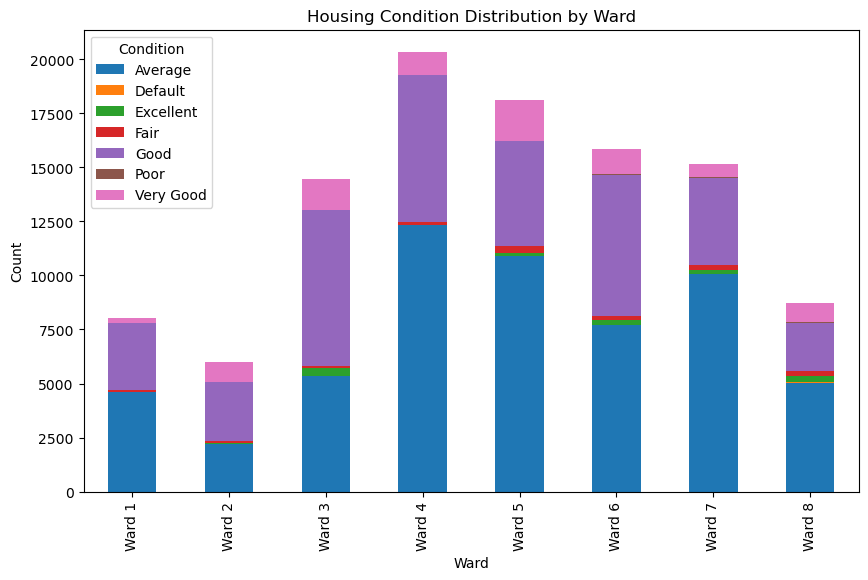

In [4]:
# Select the relevant columns for analysis
columns = ['CNDTN', 'WARD']

# Group by ward and count the occurrences of each condition
condition_counts = df_properties.groupby(['WARD', 'CNDTN']).size().unstack()

# Plot a stacked bar chart
condition_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ward')
plt.ylabel('Count')
plt.title('Housing Condition Distribution by Ward')
plt.legend(title='Condition')
plt.show()


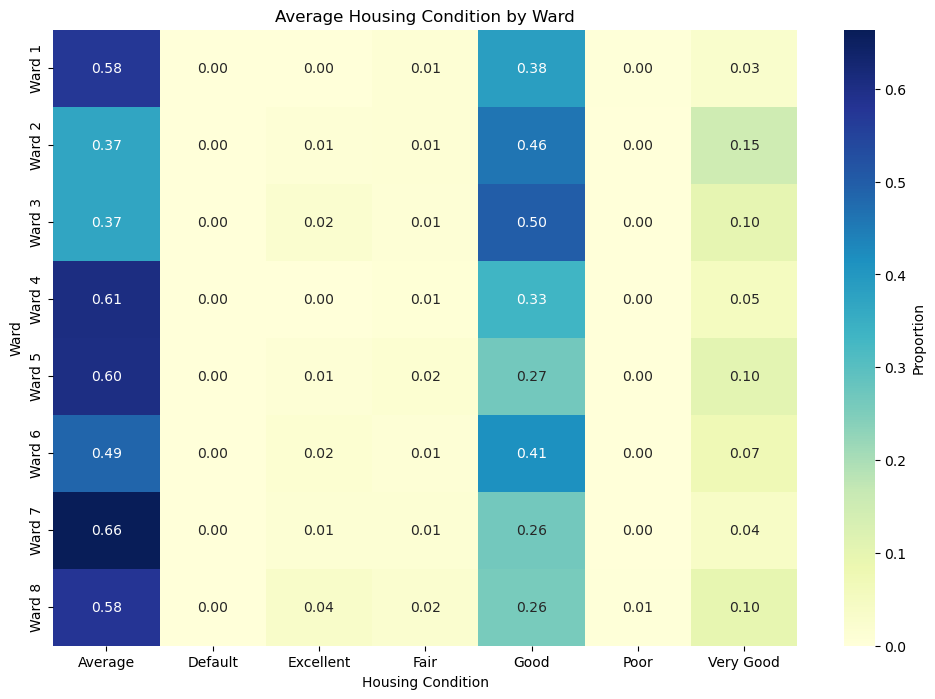

In [5]:
# Filter the dataset to include only relevant columns
df_conditions = df_properties[['WARD', 'CNDTN']]

# Drop rows with missing values
df_conditions = df_conditions.dropna()

# Pivot the data to get average condition by ward
df_pivot = df_conditions.pivot_table(index='WARD', columns='CNDTN', aggfunc=len, fill_value=0)

# Normalize the values to get proportions
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Proportion'})
plt.xlabel('Housing Condition')
plt.ylabel('Ward')
plt.title('Average Housing Condition by Ward')
plt.show()


Linear Regression Equation:
y = 441.89x + -182700.70


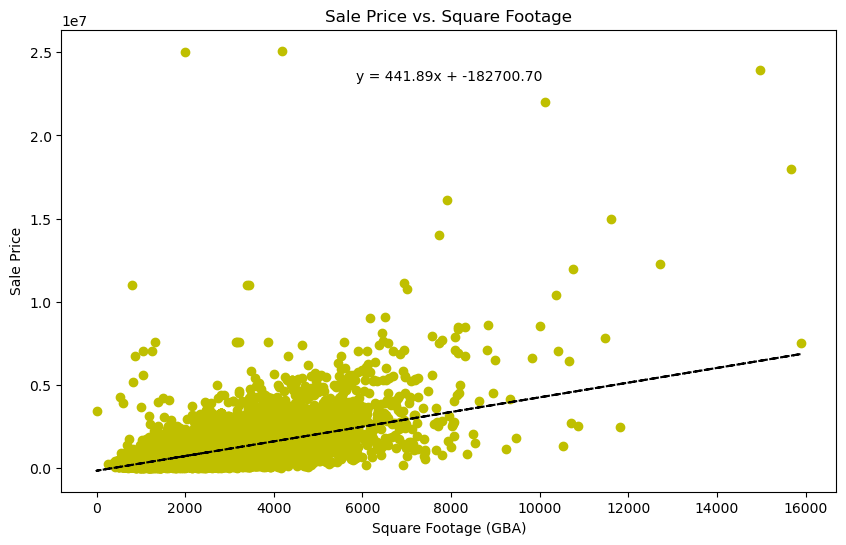

In [89]:
# Scatter plot of sale price vs. square footage
plt.figure(figsize=(10, 6))
plt.scatter(df_properties["GBA"], df_properties['PRICE'], alpha=0.3, s=2.5, color='blue')
plt.xlabel("Square Footage (GBA)")
plt.ylabel("Sale Price")
plt.title("Sale Price vs. Square Footage")
# Extract x and y values from the DataFrame
x = df_properties['GBA']
y = df_properties['PRICE']
# Remove NaN values from x and y
valid_indices = np.logical_and(~np.isnan(x), ~np.isnan(y))
x = x[valid_indices]
y = y[valid_indices]
# Perform linear regression
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
# Plot the scatter plot and regression line
plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k')
# Add linear regression equation to the graph
equation = f"y = {coef[0]:.2f}x + {coef[1]:.2f}"
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
# Print the linear regression equation
print("Linear Regression Equation:")
print(equation)
plt.show()

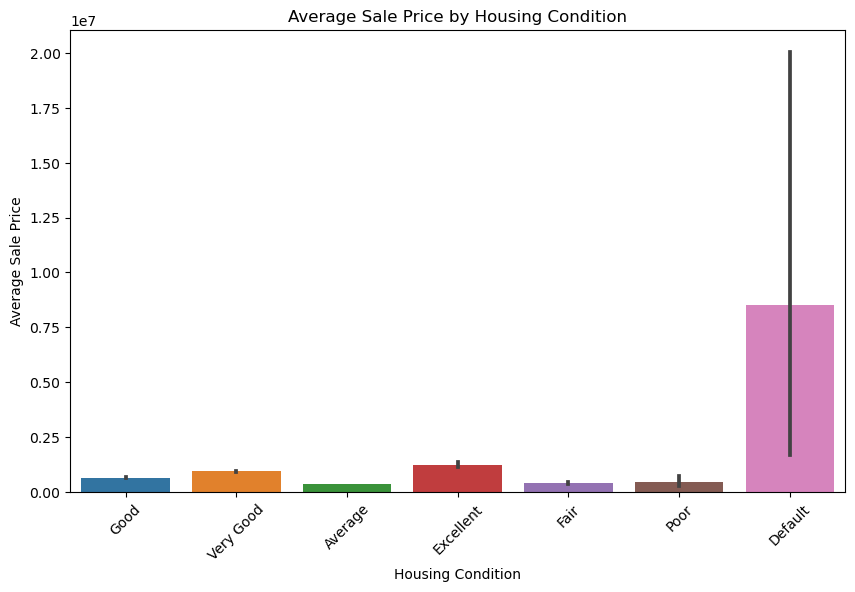

In [7]:
# Filter out empty slices in the data
df_filtered = df_properties.dropna(subset=['CNDTN', 'PRICE'])

# Bar plot of average sale price by housing condition
plt.figure(figsize=(10, 6))
sns.barplot(x='CNDTN', y='PRICE', data=df_filtered, estimator=np.mean)
plt.xlabel('Housing Condition')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Housing Condition')
plt.xticks(rotation=45)
plt.show()


In [8]:
#Sample examples!!!! Works in progress ahead!

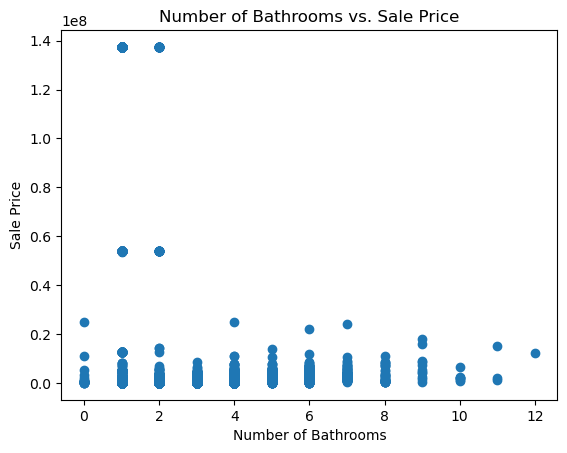

In [9]:
# How does the number of bathrooms affect the sale price of residential properties in DC?
plt.scatter(df_properties['BATHRM'], df_properties['PRICE'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price')
plt.title('Number of Bathrooms vs. Sale Price')
plt.show()


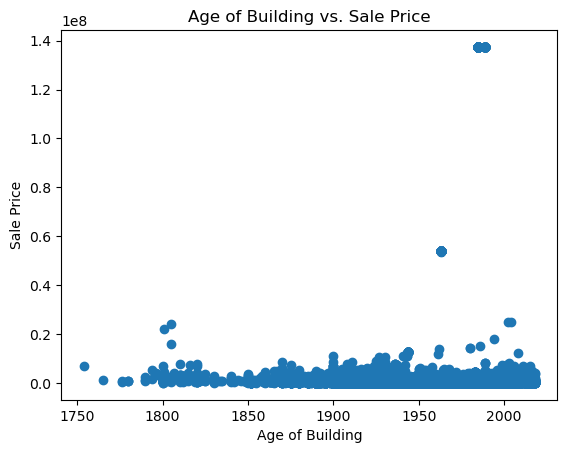

In [10]:
# Is there a correlation between the age of the building (AYB) and the sale price?
plt.scatter(df_properties['AYB'], df_properties['PRICE'])
plt.xlabel('Age of Building')
plt.ylabel('Sale Price')
plt.title('Age of Building vs. Sale Price')
plt.show()


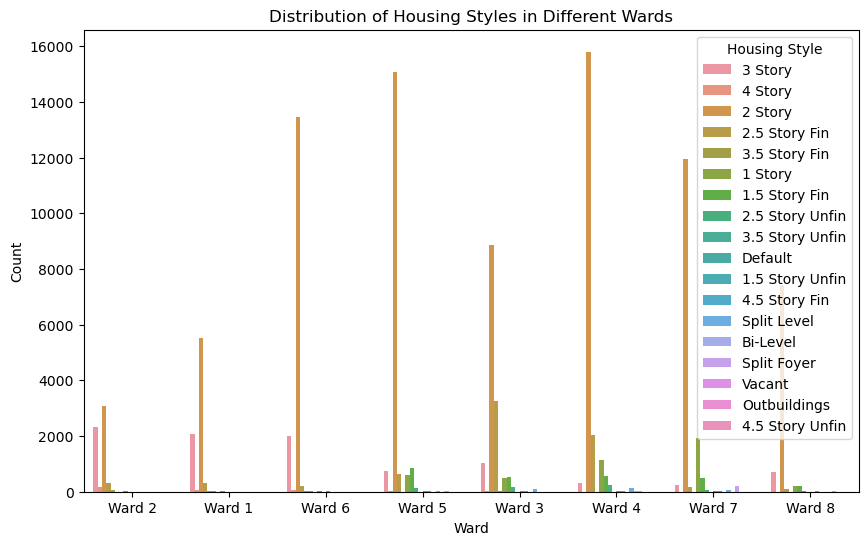

In [11]:

# What is the distribution of housing styles in different wards of DC?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_properties, x='WARD', hue='STYLE')
plt.xlabel('Ward')
plt.ylabel('Count')
plt.title('Distribution of Housing Styles in Different Wards')
plt.legend(title='Housing Style')
plt.show()

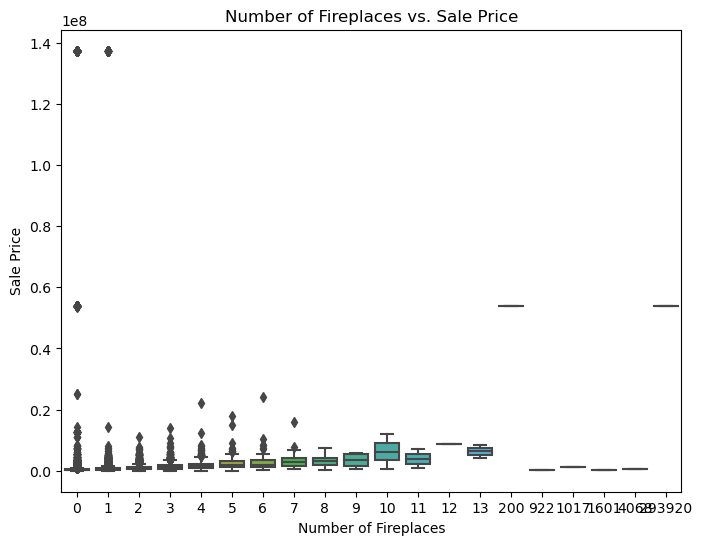

In [12]:
# How does the number of fireplaces impact the sale price of residential properties?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_properties, x='FIREPLACES', y='PRICE')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.title('Number of Fireplaces vs. Sale Price')
plt.show()


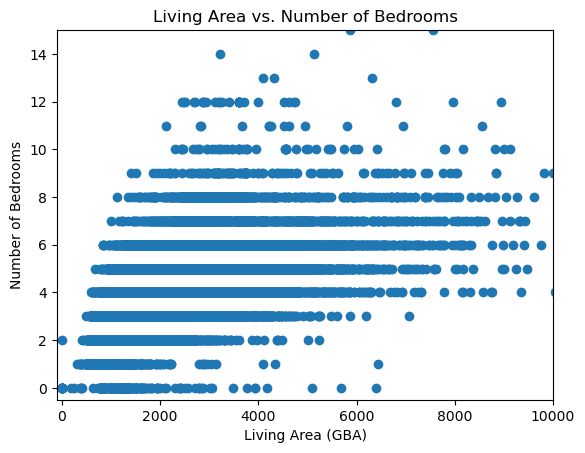

In [67]:
# Is there a relationship between the living area (GBA) and the number of bedrooms in DC homes?
plt.scatter(df_properties['GBA'], df_properties['BEDRM'])
plt.xlabel('Living Area (GBA)')
plt.ylabel('Number of Bedrooms')
plt.xlim([-100, 10000])
plt.ylim([-0.5, 15])
plt.title('Living Area vs. Number of Bedrooms')

plt.show()


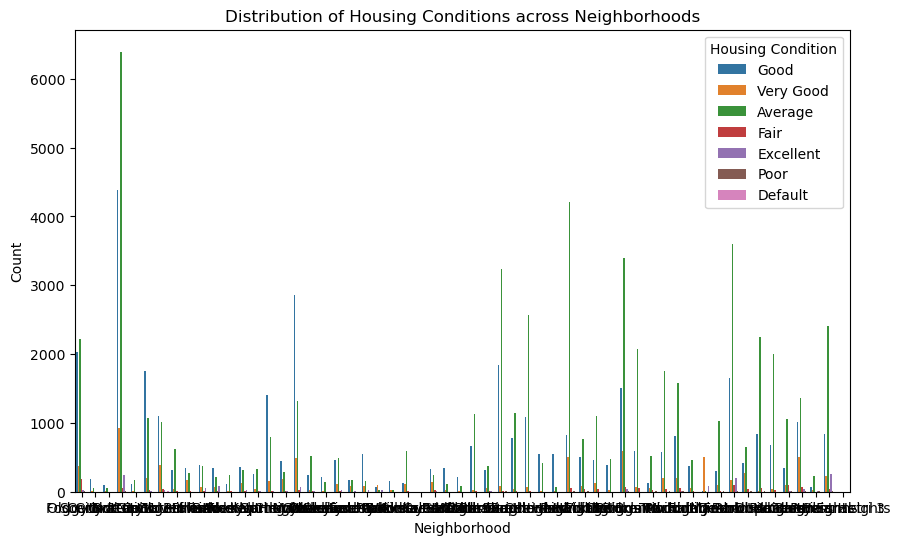

In [14]:
# What is the distribution of housing conditions across different neighborhoods in DC?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_properties, x='ASSESSMENT_NBHD', hue='CNDTN')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Distribution of Housing Conditions across Neighborhoods')
plt.legend(title='Housing Condition')
plt.show()


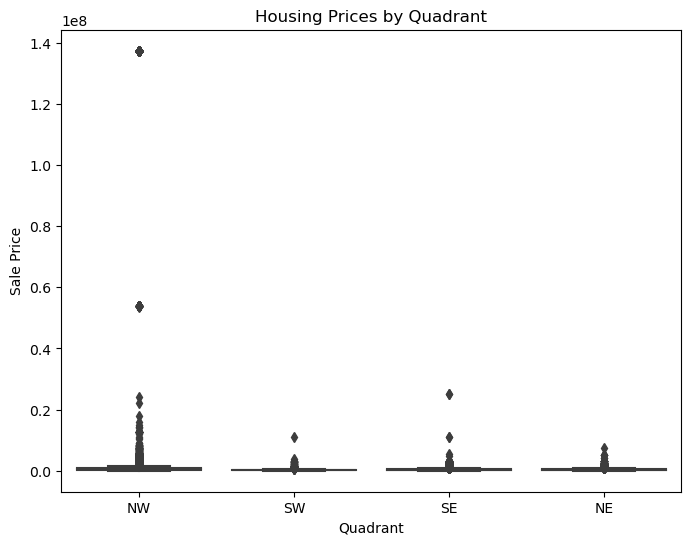

In [15]:
# Are there any significant differences in housing prices based on the quadrant (NW, NE, SW, SE) of DC?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_properties, x='QUADRANT', y='PRICE')
plt.xlabel('Quadrant')
plt.ylabel('Sale Price')
plt.title('Housing Prices by Quadrant')
plt.show()

/Applications/anaconda3/envs/old_notebook/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


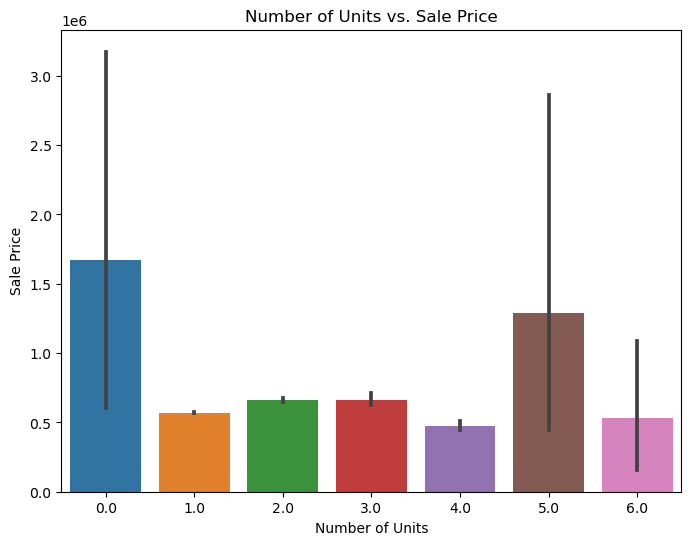

In [16]:
# How does the number of units in a property (NUM_UNITS) affect the sale price?
plt.figure(figsize=(8, 6))
sns.barplot(data=df_properties, x='NUM_UNITS', y='PRICE')
plt.xlabel('Number of Units')
plt.ylabel('Sale Price')
plt.title('Number of Units vs. Sale Price')
plt.show()

In [90]:
# One interesting point of research could be that historically, people stayed away from underresourced neighborhoods in the past,
# but as housing becomes more scarce and gentrification becomes more prevalent, does location play less of a role in determining 
# the price of a home? Like the less housing is available, the less picky people are about homes and stats like crime rate and 
# school quality, and the more house costs increase in those areas?

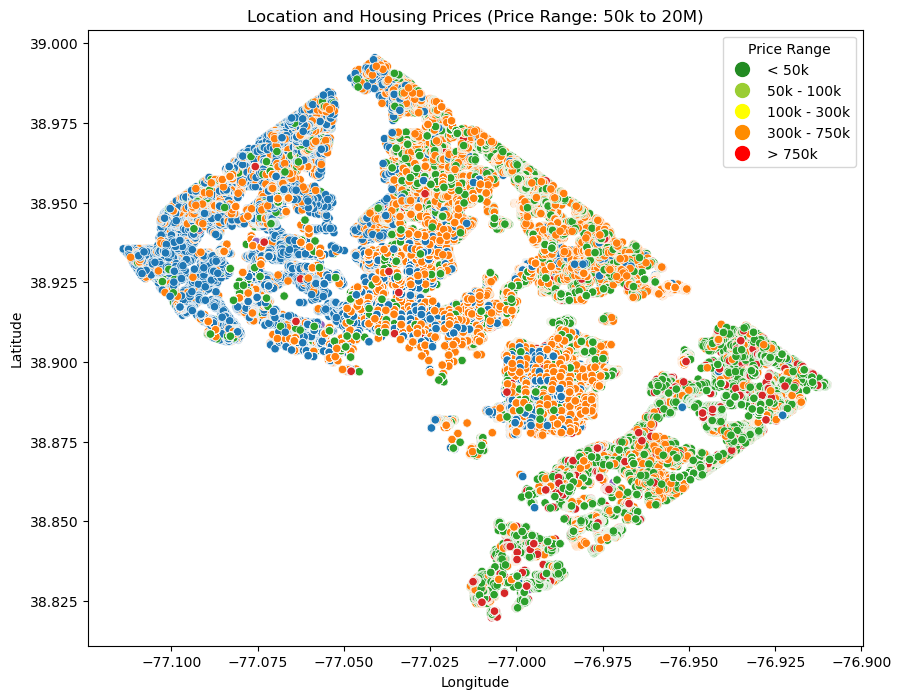

In [77]:
# Create a scatter plot to visualize the relationship between location (latitude and longitude) and housing prices
plt.figure(figsize=(10, 8))
# Define price range
price_range = [50000, 100000, 300000, 750000, 20000000]
# Define colors for each price category
colors = ['forestgreen', 'yellowgreen', 'yellow', 'darkorange', 'red']
# Map colors to each data point based on the price range
df_properties['color'] = pd.cut(df_properties['PRICE'], bins=price_range, labels=colors[:-1], right=False)
df_properties['color'] = df_properties['color'].astype('object')
df_properties.loc[df_properties['PRICE'] >= price_range[-1], 'color'] = colors[-1]
# Plot the scatter plot with custom colors
scatter = sns.scatterplot(data=df_properties, x='LONGITUDE', y='LATITUDE', hue='color', legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location and Housing Prices (Price Range: 50k to 20M)')
# Create custom legend
legend_labels = ['< 50k', '50k - 100k', '100k - 300k', '300k - 750k', '> 750k']
custom_legend = [plt.Line2D([], [], marker='o', markersize=10, color=color, linestyle='None') for color in colors]
plt.legend(custom_legend, legend_labels, title='Price Range', bbox_to_anchor=(1, 1))
plt.show()


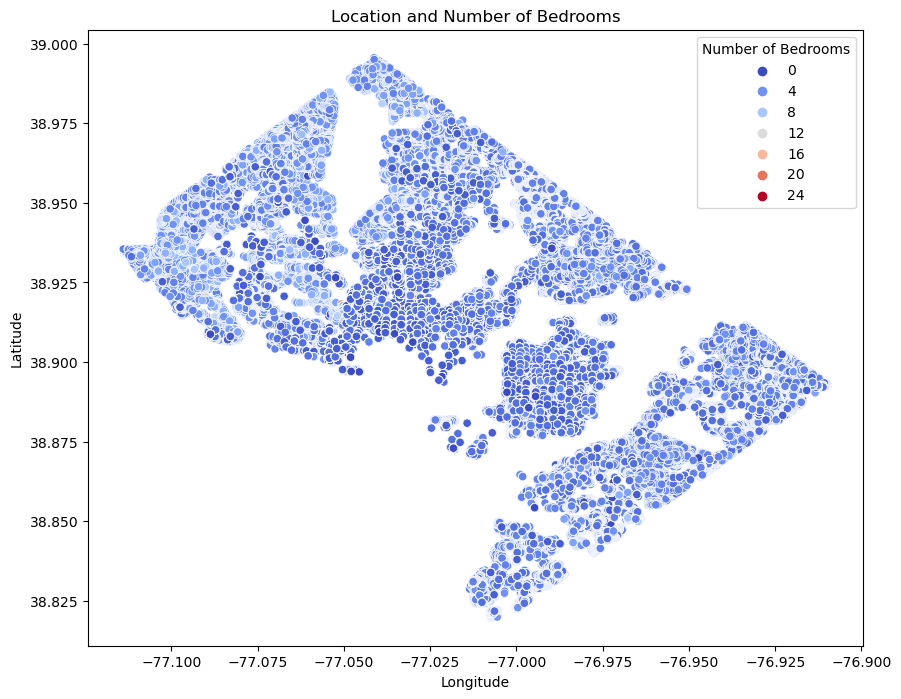

In [19]:
# Visualizing Location and Number of Bedrooms
# Create a scatter plot to visualize the relationship between location (latitude and longitude) and the number of bedrooms
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_properties, x='LONGITUDE', y='LATITUDE', hue='BEDRM', palette='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location and Number of Bedrooms')
plt.legend(title='Number of Bedrooms')
plt.show()
